In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.1. Variable Importance Plot/Output')
cur_date = "032322"

library(readxl)
library(tidyverse)
library(ggrepel)

#reading in files
MF_expression_df = data.frame(read_excel("032322_MF_Expression_Table.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(MF_expression_df)

,MF,Variable_Importance_Rank,P.Value,P.Adjust,P_Adj_covariates,Avg_Abundance,Ecig_Avg_Abundance,NS_Avg_Abundance,log2FC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MF_97,7.0542406,4.856973e-11,1.880620e-07,0.61141460,19.34139,21.21361,17.12246,0.30910031
2,MF_5,4.6837830,3.676208e-08,7.117138e-05,0.66115609,19.85841,21.94706,17.38297,0.33635273
3,MF_292,0.2770581,6.160034e-05,7.950551e-02,0.88452509,19.82281,21.43326,17.91412,0.25875454
4,MF_3345,0.2480095,9.943209e-05,8.868030e-02,0.25113324,18.85229,19.70077,17.84669,0.14259606
5,MF_1713,0.1876070,2.313246e-04,8.956890e-02,0.56549662,18.06535,18.89088,17.08695,0.14479523
6,MF_4803,0.1654220,1.969113e-03,1.815334e-01,0.05957857,18.46912,18.98672,17.85566,0.08860901


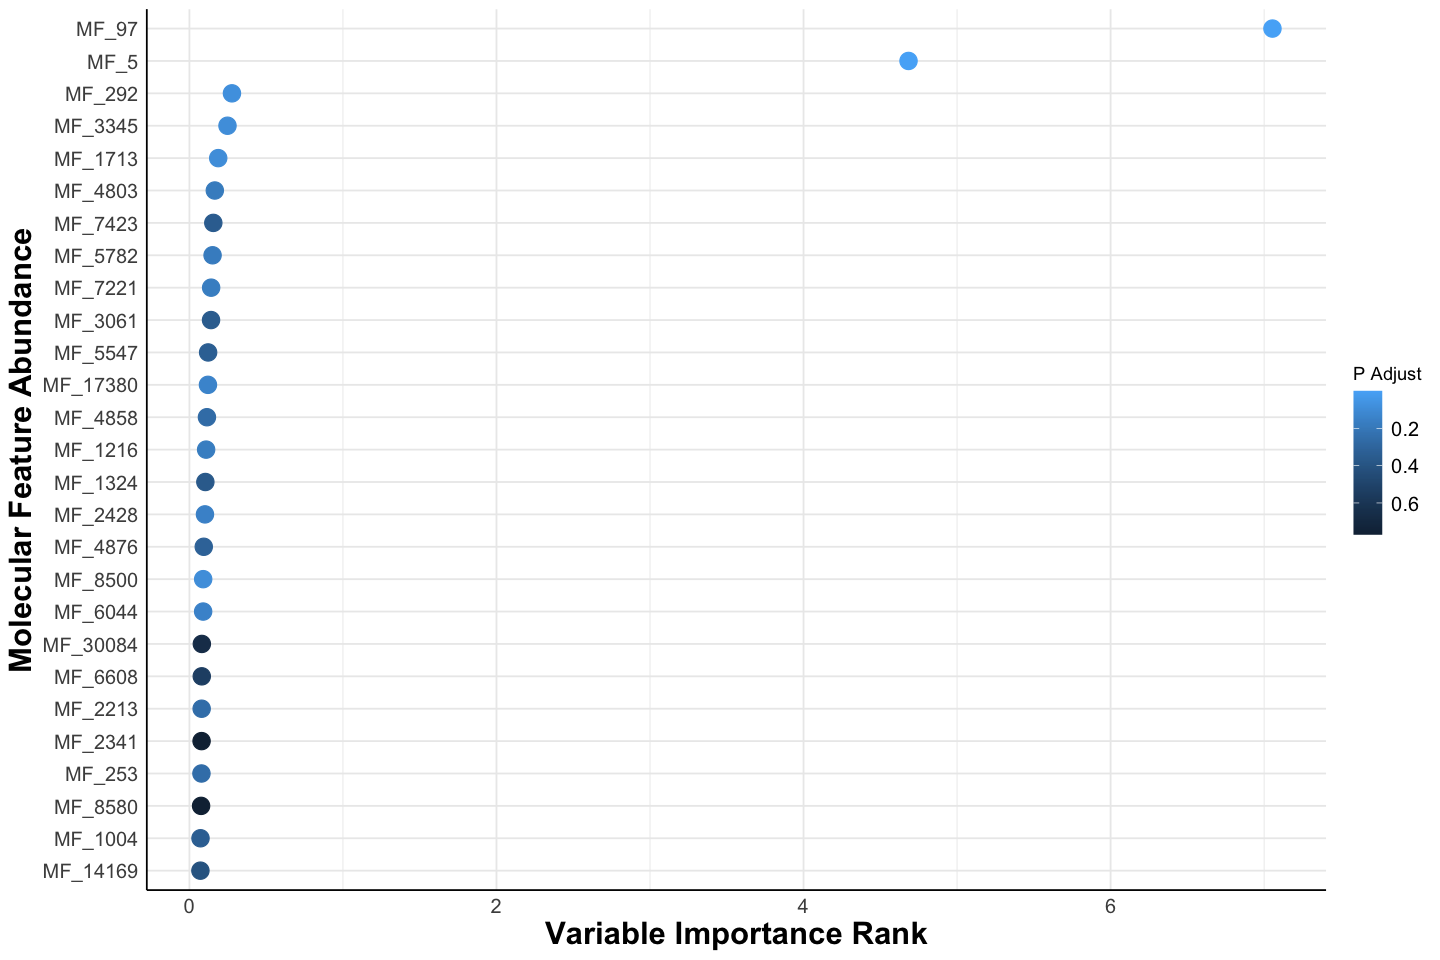

In [3]:
options(repr.plot.width=12, repr.plot.height=8) #changing size

unique_MFs = unique(MF_expression_df$MF)
descending_MF = unique_MFs[order(MF_expression_df$Variable_Importance_Rank)]
MF_expression_df$MF = factor(MF_expression_df$MF, levels = descending_MF) #need to put descending_MF into a factor for plotting 

#plotting only the most important variables to RF models (mean gini decrease > 0.07)
ggplot(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07)) + 

  geom_point(aes(x = Variable_Importance_Rank, y = MF, color = P.Adjust, size = 0.4)) + 
  theme_minimal() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Variable Importance Rank') + ylab('Molecular Feature Abundance') + #changing axis labels 

  #changing legend name and reverse color order
  scale_color_continuous(name = "P Adjust", trans = 'reverse') +
  #removing size legend
  guides(size = "none")

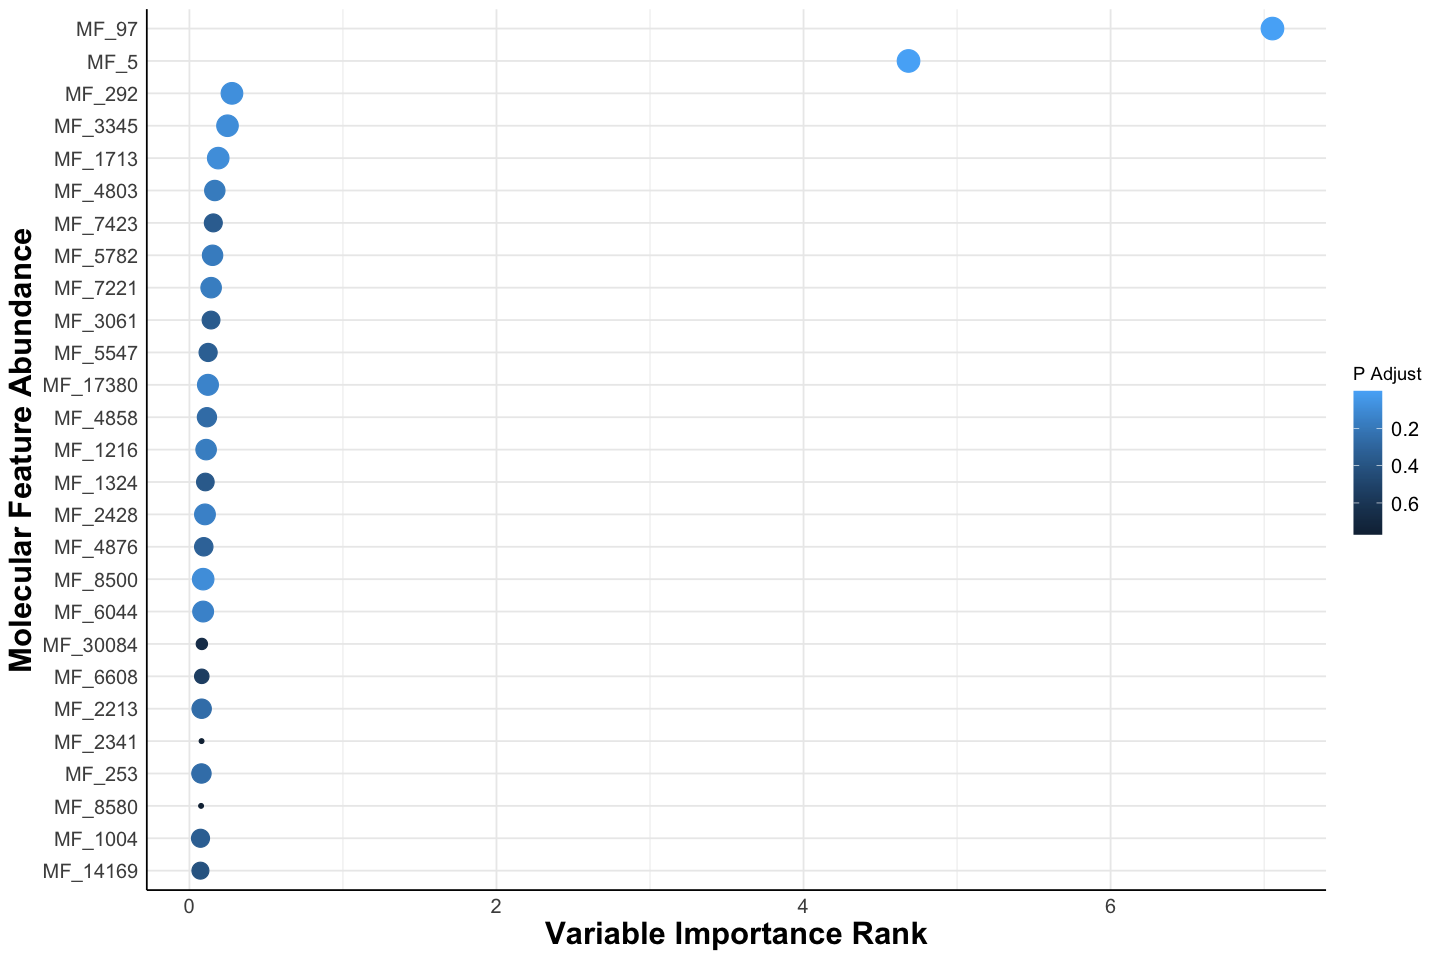

In [4]:
ggplot(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07)) + 

  geom_point(aes(x = Variable_Importance_Rank, y = MF, color = P.Adjust, size = P.Adjust)) + 
  theme_minimal() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Variable Importance Rank') + ylab('Molecular Feature Abundance') + #changing axis labels 

  #changing legend name and reverse color order
  scale_color_continuous(name = "P Adjust", trans = 'reverse') +
  scale_size_continuous(name = "P Adjust", trans = 'reverse') +
  #removing size legend
  guides(size = "none")

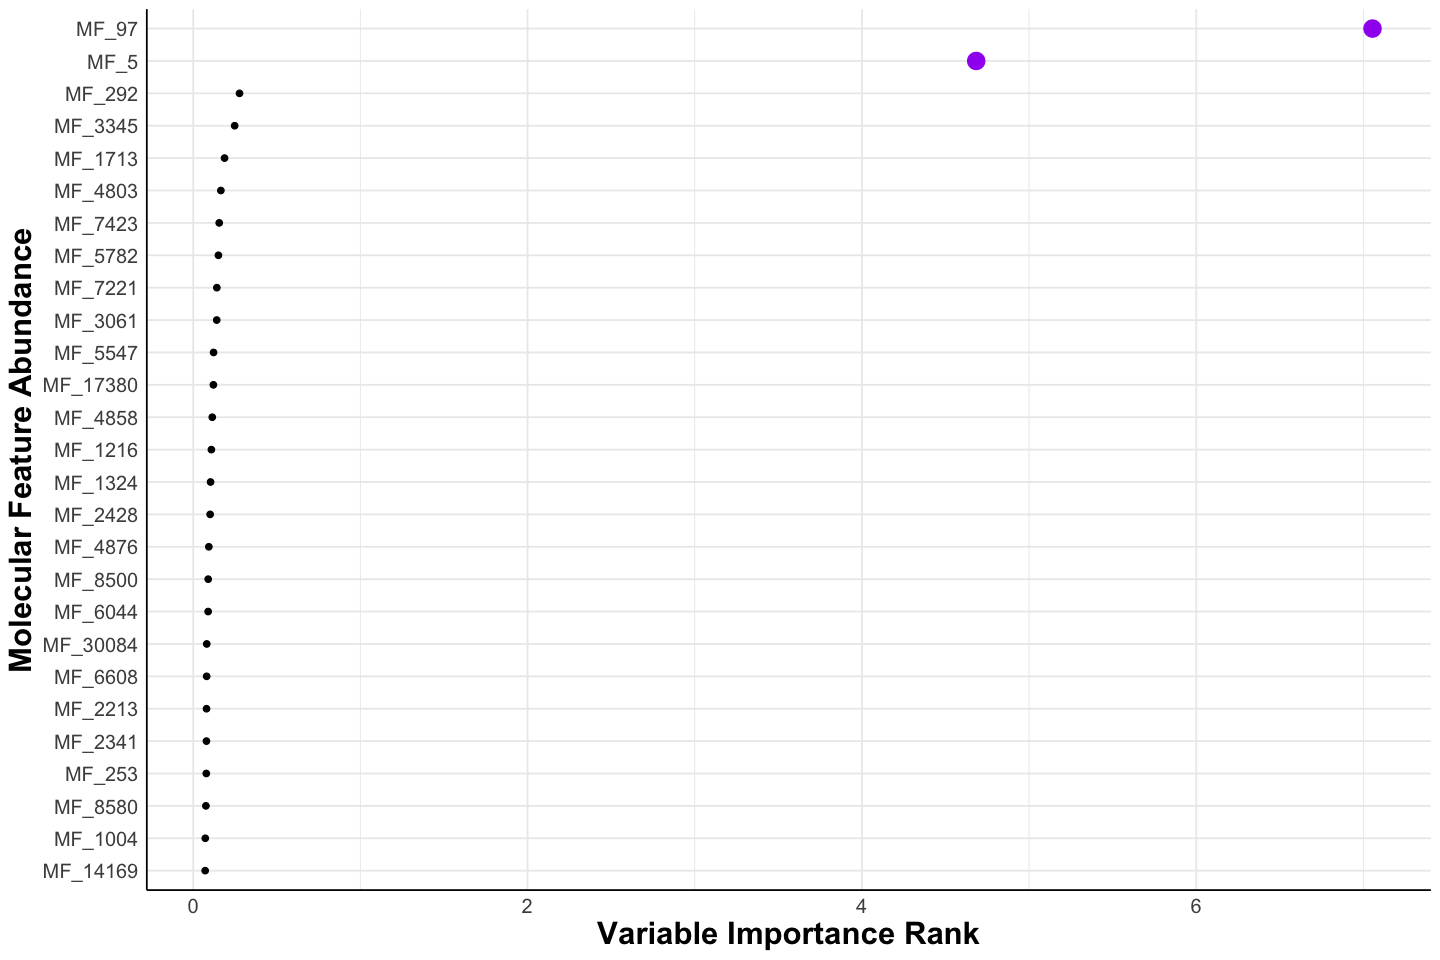

In [5]:
#now only coloring significant points (padj < 0.05)
#THIS ONE MAKES THE MOST SINCE, BECAUSE WE WOULD ONLY CARE ABOUT SIGNIFICANT ASSOCIATIONS
ggplot() + 

  geom_point(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07), aes(x = Variable_Importance_Rank, y = MF)) + 
  geom_point(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07, P.Adjust < 0.05), aes(x = Variable_Importance_Rank, y = MF, size = 0.4),
            color = "purple") +
  theme_minimal() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Variable Importance Rank') + ylab('Molecular Feature Abundance') + #changing axis labels 

  #changing legend name and reverse color order
  scale_color_continuous(name = "P Adjust", trans = 'reverse') +
  scale_size_continuous(name = "P Adjust", trans = 'reverse') +
  #removing size legend
  guides(size = "none")

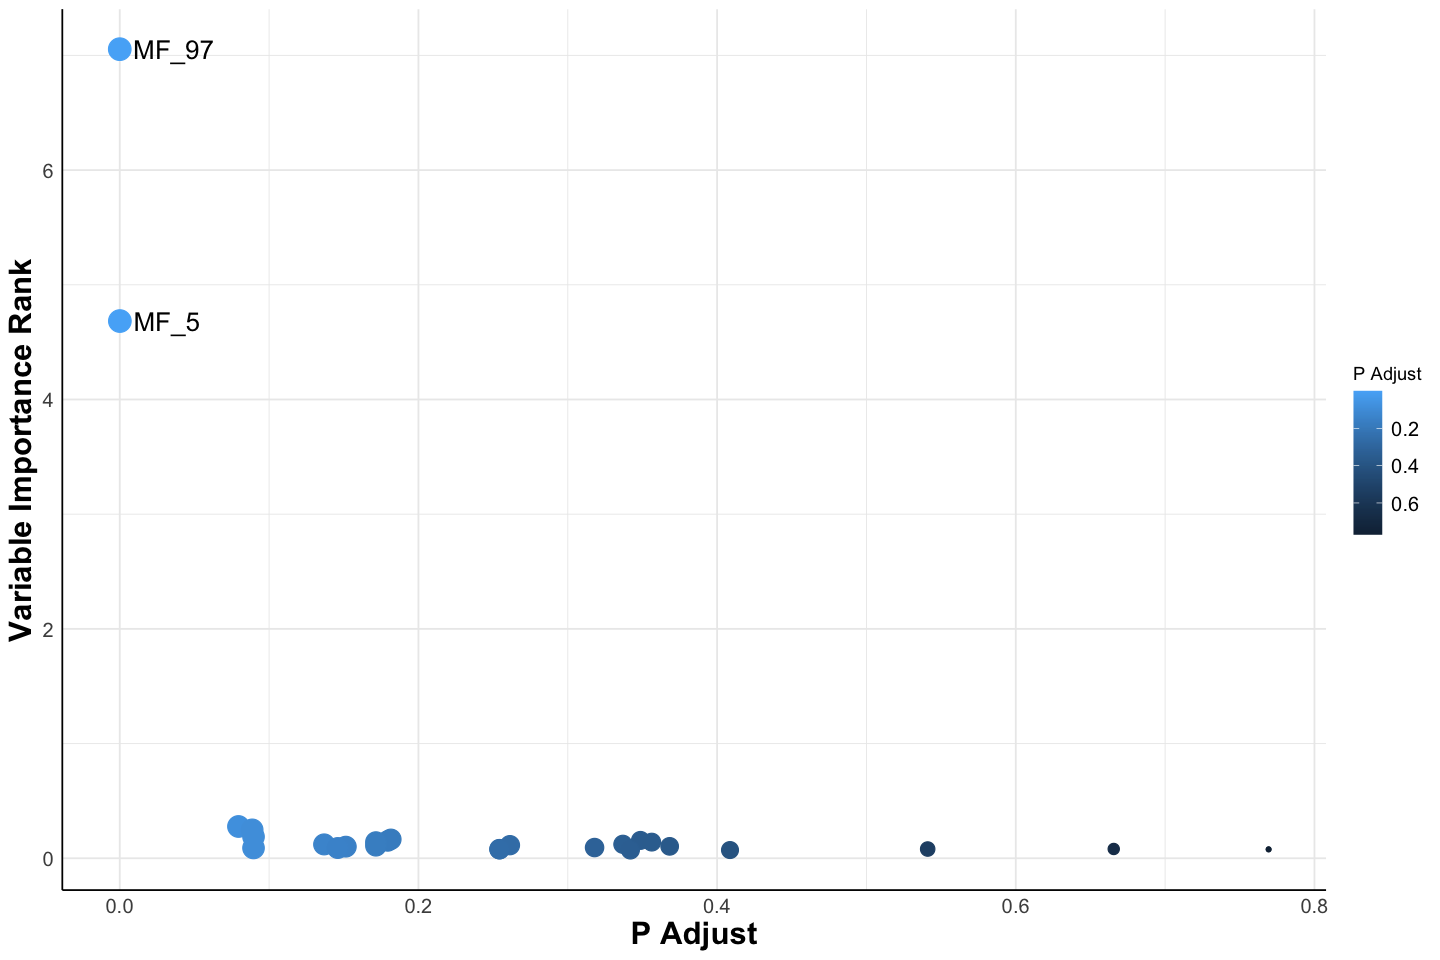

In [7]:
ggplot(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07)) + 

  geom_point(aes(y = Variable_Importance_Rank, x = P.Adjust, color = P.Adjust, size = P.Adjust)) + 

  #labeling points with statistical significance and a high level of correlation
  geom_text_repel(data = MF_expression_df %>%
          filter(Variable_Importance_Rank > 0.07, P.Adjust < 0.05), 
                  aes(x = P.Adjust, y = Variable_Importance_Rank, label = MF),
    xlim = c(NA, 0.6),
    hjust = 1,
    segment.size = 0.4,
    size = 5.5, 
    show.legend = FALSE) +

  theme_minimal() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('P Adjust') + ylab('Variable Importance Rank') + #changing axis labels 

  #changing legend name and reverse color order
  scale_color_continuous(name = "P Adjust", trans = 'reverse') +
  scale_size_continuous(name = "P Adjust", trans = 'reverse') +
  #removing size legend
  guides(size = "none")